In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

from sklearn.model_selection import KFold, cross_val_predict, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [67]:
train = pd.read_csv("./Train.csv")
test = pd.read_csv("./Eval.csv")

print(train.shape, test.shape)

((147072, 11), (50000, 10))


In [68]:
def desc_stats(df):
    desc = df.describe()
    desc.loc['Unique'] = [len(df[col].unique()) for col in desc.columns]
    desc.loc['95%'] = [df[col].quantile(0.95) for col in desc.columns]
    desc.loc['99%'] = [df[col].quantile(0.99) for col in desc.columns]
    desc.loc["Missing"] = [df[col].isnull().sum() for col in desc.columns]
    return desc.T

In [69]:
train['class_col'].value_counts(normalize=True)

0.0    0.93349
1.0    0.06651
Name: class_col, dtype: float64

In [70]:
train.isnull().sum()

variable_0    47072
variable_1    47072
variable_2    47072
variable_3    47072
variable_4    47072
variable_5    47072
variable_6    47072
variable_7    47072
variable_8    47072
variable_9    47072
class_col     47072
dtype: int64

We have 47072 missing values for all features. So we should delete all the data rows from train.

In [71]:
train = train.loc[train['class_col'].notnull()]
train.shape

(100000, 11)

In [72]:
desc_stats(train)

,count,mean,std,min,25%,50%,75%,max,Unique,95%,99%,Missing
variable_0,100000.0,12.107321,528.035137,-0.291358,-0.234323,0.001486,0.759917,95823.652220,84517.0,1.598362,1.763693,0.0
variable_1,100000.0,0.013599,0.671062,-2.363636,-0.500000,0.000000,0.500000,2.590909,85.0,1.181818,1.590909,0.0
variable_2,100000.0,0.433970,4.324017,0.000000,0.000000,0.000000,0.000000,98.000000,16.0,2.000000,4.000000,0.0
variable_3,100000.0,500.308938,2181.510949,-0.528734,-0.275459,0.000119,0.721373,318121.775400,79055.0,3539.749705,7229.917076,0.0
variable_4,100000.0,0.167428,1.843019,-0.744872,-0.471368,0.004530,0.520085,305.932051,11928.0,1.562821,3.221026,0.0
variable_5,100000.0,0.079292,0.860352,-1.333333,-0.500000,0.000000,0.500000,8.333333,55.0,1.666667,2.833333,0.0
variable_6,100000.0,0.277340,4.301489,0.000000,0.000000,0.000000,0.000000,98.000000,19.0,1.000000,3.000000,0.0
variable_7,100000.0,0.010735,0.571463,-0.500000,-0.500000,0.000000,0.500000,26.500000,27.0,1.000000,2.000000,0.0
variable_8,100000.0,0.251830,4.287297,0.000000,0.000000,0.000000,0.000000,98.000000,11.0,1.000000,2.000000,0.0
variable_9,100000.0,0.740360,1.108458,0.000000,0.000000,0.000000,1.000000,20.000000,12.0,3.000000,4.000000,0.0


In [73]:
desc_stats(test)

,count,mean,std,min,25%,50%,75%,max,Unique,95%,99%,Missing
variable_0,50000.0,9.200853,332.590404,-0.291358,-0.235981,-0.003010,0.777610,38765.433550,42459.0,1.598362,1.798480,0.0
variable_1,50000.0,0.013057,0.672228,-1.409091,-0.500000,0.000000,0.500000,2.409091,80.0,1.181818,1.590909,0.0
variable_2,50000.0,0.395160,3.917054,0.000000,0.000000,0.000000,0.000000,98.000000,14.0,2.000000,4.000000,0.0
variable_3,50000.0,525.559732,4050.842439,-0.528734,-0.277842,-0.000336,0.729060,475581.611600,41393.0,3509.382410,7072.670749,0.0
variable_4,50000.0,0.173164,2.893111,-0.744872,-0.488462,-0.004188,0.511538,513.571367,8739.0,1.569846,3.172436,0.0
variable_5,50000.0,0.067797,0.852204,-1.333333,-0.500000,0.000000,0.500000,8.166667,54.0,1.666667,2.666667,0.0
variable_6,50000.0,0.243240,3.891429,0.000000,0.000000,0.000000,0.000000,98.000000,15.0,1.000000,3.000000,0.0
variable_7,50000.0,0.005890,0.551486,-0.500000,-0.500000,0.000000,0.500000,14.000000,20.0,1.000000,1.500000,0.0
variable_8,50000.0,0.217500,3.877403,0.000000,0.000000,0.000000,0.000000,98.000000,13.0,1.000000,2.000000,0.0
variable_9,50000.0,0.731520,1.104130,0.000000,0.000000,0.000000,1.000000,13.000000,12.0,3.000000,4.000000,0.0


Good to see that all variables in train and test have similar distributions

In [74]:
train.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,class_col
0,1.616623,-0.909091,3.0,-0.041629,0.284188,0.166667,0.0,0.0,1.0,2.0,0.0
1,-0.029310,1.500000,0.0,0.551353,-0.515812,0.166667,0.0,-0.5,0.0,0.0,0.0
2,1.598362,0.227273,0.0,-0.280171,-0.385897,-1.166667,0.0,-0.5,0.0,0.0,0.0
3,0.355677,0.954545,0.0,-0.101158,0.158718,-0.333333,0.0,0.0,0.0,0.0,0.0
4,-0.291358,0.590909,0.0,-0.299727,0.696838,0.000000,0.0,0.5,0.0,0.0,0.0


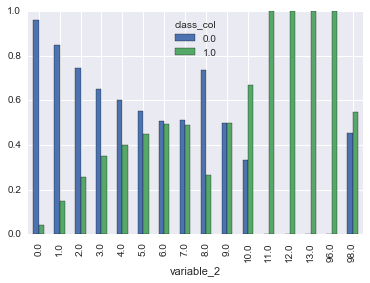

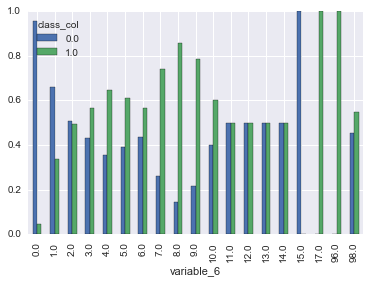

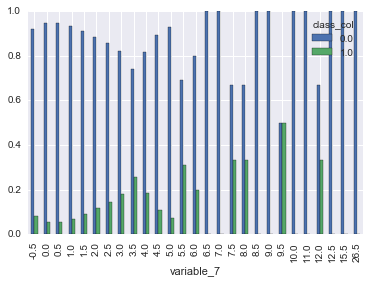

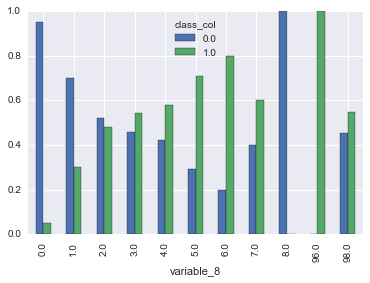

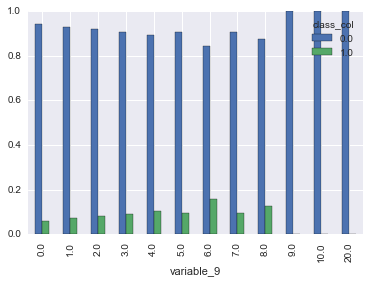

In [75]:
for col in ['variable_2', 'variable_6', 'variable_7','variable_8', 'variable_9']:
    train.groupby(col)['class_col'].value_counts(normalize=True).unstack().plot.bar()    

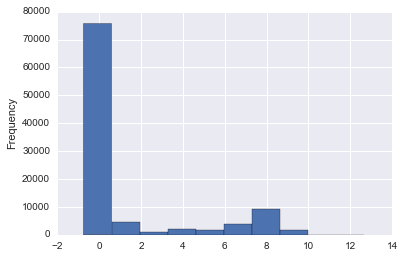

In [76]:
np.log(train['variable_3']+1).plot.hist(bins=10)
plt.show()

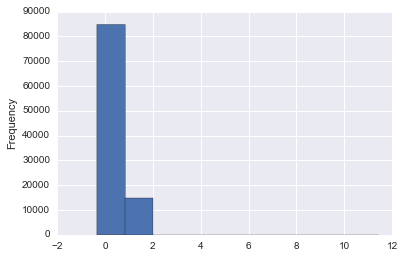

In [77]:
np.log(train['variable_0']+1).plot.hist(bins=10)
plt.show()

In [78]:
train['variable_0_lg'] = np.log(train['variable_0']+1)
train['variable_3_lg'] = np.log(train['variable_3']+1)

test['variable_0_lg'] = np.log(test['variable_0']+1)
test['variable_3_lg'] = np.log(test['variable_3']+1)

(-1, 4)

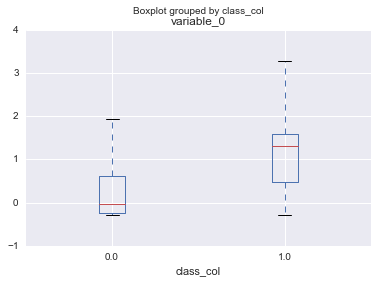

In [79]:
train.boxplot(column='variable_0', by = 'class_col')
plt.ylim(-1,4)

(-2, 3)

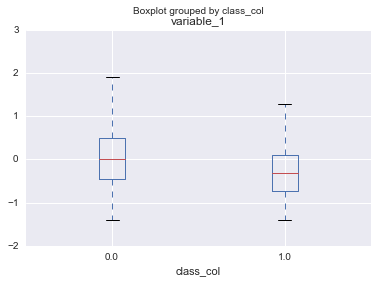

In [80]:
train.boxplot(column='variable_1', by = 'class_col')
plt.ylim(-2,3)

In [81]:
train.loc[train['variable_2'] > 10].shape

(194, 13)

(-2, 5)

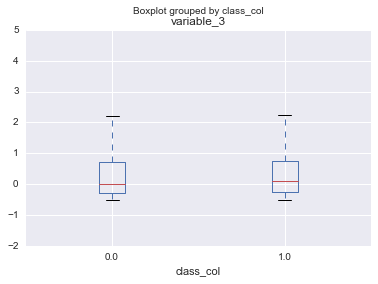

In [82]:
train.boxplot(column='variable_3', by = 'class_col')
plt.ylim(-2,5)

In [83]:
train.loc[train['variable_3'] > 5000].shape

(2532, 13)

(-2, 3)

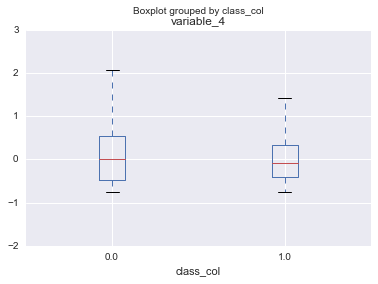

In [84]:
train.boxplot(column='variable_4', by = 'class_col')
plt.ylim(-2,3)

In [85]:
# Lets create dummy columns of categorical variables
for col in ['variable_2', 'variable_6', 'variable_7','variable_8', 'variable_9']:
    train[col] = train[col].astype('object')
    test[col] = test[col].astype('object')

In [86]:
train = pd.get_dummies(train,prefix_sep='_')
test = pd.get_dummies(test,prefix_sep='_')
train.head()

,variable_0,variable_1,variable_3,variable_4,variable_5,class_col,variable_0_lg,variable_3_lg,variable_2_0.0,variable_2_1.0,...,variable_9_2.0,variable_9_3.0,variable_9_4.0,variable_9_5.0,variable_9_6.0,variable_9_7.0,variable_9_8.0,variable_9_9.0,variable_9_10.0,variable_9_20.0
0,1.616623,-0.909091,-0.041629,0.284188,0.166667,0.0,0.961885,-0.042520,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.029310,1.500000,0.551353,-0.515812,0.166667,0.0,-0.029749,0.439128,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.598362,0.227273,-0.280171,-0.385897,-1.166667,0.0,0.954881,-0.328742,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.355677,0.954545,-0.101158,0.158718,-0.333333,0.0,0.304301,-0.106648,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.291358,0.590909,-0.299727,0.696838,0.000000,0.0,-0.344406,-0.356285,1,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
train = train.drop(labels=['variable_0','variable_3'],axis=1)
test = test.drop(labels=['variable_0','variable_3'],axis=1)

In [88]:
X= train.drop(labels=['class_col'], axis=1)
y=train['class_col']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)
print(X_train.shape, X_test.shape)

((70000, 90), (30000, 90))


In [89]:
clf = RandomForestClassifier()
model = clf.fit(X_train, y_train)
pred_rf = clf.predict(X_test)
from sklearn import metrics
acc = metrics.accuracy_score(y_test,pred_rf)

In [90]:
for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(clf, X_test, y_test, scoring=metric)
    print("mean {}: {}, all: {}".format(metric, scores.mean(), scores))

mean accuracy: 0.931533346202, all: [ 0.93010699  0.934       0.93049305]
mean precision: 0.454679157468, all: [ 0.45132743  0.49090909  0.42180095]
mean recall: 0.148867726239, all: [ 0.15859031  0.15124816  0.13676471]
mean roc_auc: 0.781657304462, all: [ 0.78754593  0.77536467  0.78206132]


In [91]:
metrics.confusion_matrix(y_test, pred_rf)

array([[27634,   324],
       [ 1718,   324]])

In [59]:
# results dont look very good... high false postive rates.. low precision and low recall

In [60]:
# Lets try various models to find which model gives better ROC

In [ ]:
# Model selection
def score_model(clf):
    print ("model: {} ...".format(clf.__class__.__name__))
    start = time.time()
    scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=5) 
    end = time.time()
    print("time: {:.3f}s".format(end - start))
    print("roc_auc: {:.3f}\n".format(scores.mean()))

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import time

score_model(DecisionTreeClassifier())
score_model(GaussianNB())
score_model(svm.SVC(kernel='linear', C = 1.0))
score_model(LogisticRegression())
score_model(RandomForestClassifier())
score_model(XGBClassifier())

model: DecisionTreeClassifier ...
time: 2.848s
roc_auc: 0.266

model: GaussianNB ...
time: 0.765s
roc_auc: 0.383

model: SVC ...


TypeError: unhashable type

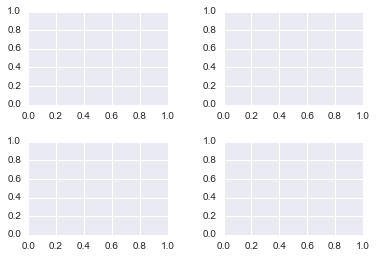

In [98]:
clf = svm.SVC(kernel='linear', C = 1.0)
sv = clf.fit(X_train, y_train)
sv.

In [49]:
# Parameter tunning in Xtreme gradient Boosting
import datetime
import sys
import math
 
import numpy as np
from sklearn.grid_search import GridSearchCV
 
#sys.path.append('xgboost/wrapper/')
import xgboost as xgb
 
class XGBoostClassifier():
    def __init__(self, num_boost_round=10, **params):
        self.clf = None
        self.num_boost_round = num_boost_round
        self.params = params
        self.params.update({'objective': 'multi:softprob'})
 
    def fit(self, X, y, num_boost_round=None):
        num_boost_round = num_boost_round or self.num_boost_round
        self.label2num = dict((label, i) for i, label in enumerate(sorted(set(y))))
        dtrain = xgb.DMatrix(X, label=[self.label2num[label] for label in y])
        self.clf = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=num_boost_round)
 
    def predict(self, X):
        num2label = dict((i, label)for label, i in self.label2num.items())
        Y = self.predict_proba(X)
        y = np.argmax(Y, axis=1)
        return np.array([num2label[i] for i in y])
 
    def predict_proba(self, X):
        dtest = xgb.DMatrix(X)
        return self.clf.predict(dtest)
 
    def score(self, X, y):
        Y = self.predict_proba(X)
        return 1 / logloss(y, Y)
 
    def get_params(self, deep=True):
        return self.params
 
    def set_params(self, **params):
        if 'num_boost_round' in params:
            self.num_boost_round = params.pop('num_boost_round')
        if 'objective' in params:
            del params['objective']
        self.params.update(params)
        return self
    
    
def logloss(y_true, Y_pred):
    label2num = dict((name, i) for i, name in enumerate(sorted(set(y_true))))
    return -1 * sum(math.log(y[label2num[label]]) if y[label2num[label]] > 0 else -np.inf for y, label in zip(Y_pred, y_true)) / len(Y_pred)


def main():
    clf = XGBoostClassifier(
        eval_metric = 'logloss',
        num_class = 2,
        nthread = 4,
        eta = 0.07,
        num_boost_round = 10,
        max_depth = 9,
        min_child_weight = 1,
        subsample = 0.85,
        colsample_bytree = 0.8,
        silent = 1,
        reg_alpha=0.07,
        gamma = 0.9
        )
    parameters = {
        'gamma':[0.6, 0.7,0.8,0.9,1],
        #'num_boost_round': [50, 100, 150,250,500],
        #'eta': [0.1,0.15,0.2],
        'reg_alpha':[0.067,0.07, 0.072,0.075],
        #'max_depth': [5,7,8],
        #'min_child_weight':[1,2,3]
        #'subsample': [0.9, 0.8, 0.85, 0.95],
        #'colsample_bytree': [0.8,0.85, 0.9, 0.95],
    }
    clf = GridSearchCV(clf, parameters, n_jobs=1, cv=3)
    print("Fitting the model")
    clf.fit(X_train,y_train)
    print("Training model completed")
    best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
    print(score)
    for param_name in sorted(best_parameters.keys()):
        print("%s: %r" % (param_name, best_parameters[param_name]))
                
    print(clf.predict(X_test))


if __name__ == '__main__':
    start_time=datetime.datetime.now()
    main()
    print(datetime.datetime.now()-start_time)


Fitting the model
Training model completed
2.72884252203
gamma: 1
reg_alpha: 0.07
[ 0.  0.  0. ...,  0.  0.  0.]
0:05:27.574682


In [27]:
#xgtest = xgb.DMatrix(X_test)
def runXGB(X_train, y_train, seed_val=25):
    print(X_train.shape, y_train.shape)
    param = {}
    param['objective'] = 'binary:logistic'
    param['eta'] = 0.2
    param['max_depth'] = 8
    param['silent'] = 1
    param['num_class'] = 2
    param['eval_metric'] = "logloss"
    param['min_child_weight'] = 1
    param['subsample'] = 0.8
    param['colsample_bytree'] = 0.95
    param['seed'] = seed_val
    param['gamma'] = 0.8 
    param['reg-alpha']=0.07
    num_rounds = 100

    plst = list(param.items())
    xgtrain = xgb.DMatrix(X_train, label=y_train)
    model = xgb.train(plst, xgtrain, num_rounds)
    return model

model = runXGB(X_train, y_train, seed_val=25)
preds = model.predict(X_test)

((70000, 90), (70000,))


XGBoostError: [20:14:27] src/objective/regression_obj.cc:90: Check failed: (preds.size()) == (info.labels.size()) labels are not correctly providedpreds.size=140000, label.size=70000

In [36]:
clf = XGBClassifier(
    #num_class = 2,
    nthread = 4,
    learning_rate = 0.2,
    n_estimators = 100,
    max_depth = 8,
    min_child_weight = 1,
    subsample = 0.85,
    colsample_bytree = 0.8,
    silent = 1,
    reg_alpha=0.07,
    gamma = 0.9
    )

#clf = RandomForestClassifier()
model = clf.fit(X_train, y_train)
pred_xgb = clf.predict(X_test)

In [37]:
pd.crosstab(y_test, pred_xgb)

col_0,0.0,1.0
class_col,,
0.0,27592,368
1.0,1632,408


In [61]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

param = {'max_depth': 10, 'eta': 0.2, 'silent': 0, 'objective': 'binary:logistic', 'subsample':0.85,
        'colsample_bytree':0.8, 'reg_alpha':0.07, 'gamma':0.9}
param['nthread'] = 4
param['eval_metric'] = 'auc'

num_round = 26
bst = xgb.train(param, dtrain, num_round)

In [64]:
num_round = 100
xgb.cv(param, dtrain, num_round, nfold=5,
       metrics={'logloss'}, seed=0,
       callbacks=[xgb.callback.print_evaluation(show_stdv=True)])

[0]	train-logloss:0.547147+0.000113068	test-logloss:0.549486+0.000430575
[1]	train-logloss:0.448355+0.000653375	test-logloss:0.453071+0.000904311
[2]	train-logloss:0.377371+0.000549801	test-logloss:0.384726+0.00138416
[3]	train-logloss:0.325446+0.00152605	test-logloss:0.335103+0.00148364
[4]	train-logloss:0.285772+0.00150944	test-logloss:0.297647+0.00176145
[5]	train-logloss:0.255137+0.00144639	test-logloss:0.269593+0.00211496
[6]	train-logloss:0.231124+0.00119655	test-logloss:0.248048+0.00250382
[7]	train-logloss:0.212368+0.00117298	test-logloss:0.231592+0.00275251
[8]	train-logloss:0.197733+0.000856342	test-logloss:0.219054+0.00294277
[9]	train-logloss:0.185841+0.00107893	test-logloss:0.209537+0.00313103
[10]	train-logloss:0.176665+0.00149443	test-logloss:0.202332+0.00311346
[11]	train-logloss:0.16908+0.00146119	test-logloss:0.196958+0.00337788
[12]	train-logloss:0.162539+0.00117912	test-logloss:0.192713+0.00375073
[13]	train-logloss:0.157339+0.00122378	test-logloss:0.189544+0.003719

KeyboardInterrupt: 

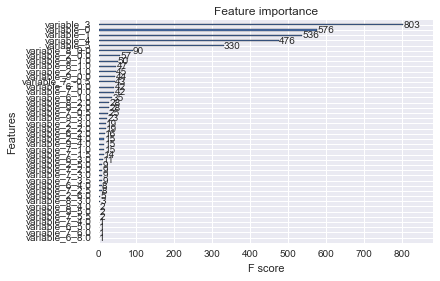

In [59]:
xgb.plot_importance(bst)